In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
import yaml

R = 0.001987


In [2]:
from itc_classes import *

In [3]:
with open('config_bayesian_ITC.yaml', "r") as f:
    config = yaml.safe_load(f)

binding_states=np.array(config['binding_states'])
degeneracy=np.array(config['degeneracy_micro_macro'])
components=np.array(config['components_binding_states'])
names_components=config['names_components']

binding=binding_structure(components,names_components, degeneracy,binding_states)

print(names_components,binding_states)

['LC8', 'TcTex', 'IC3'] ['L1_' 'L11' 'T1_' 'T1_L1_' 'T1_L11' 'T11' 'T11L1_' 'T11L11']


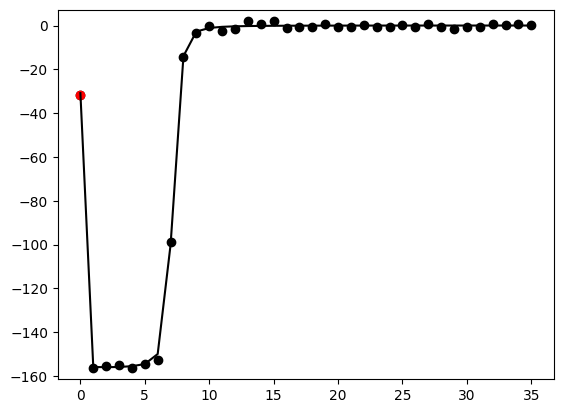

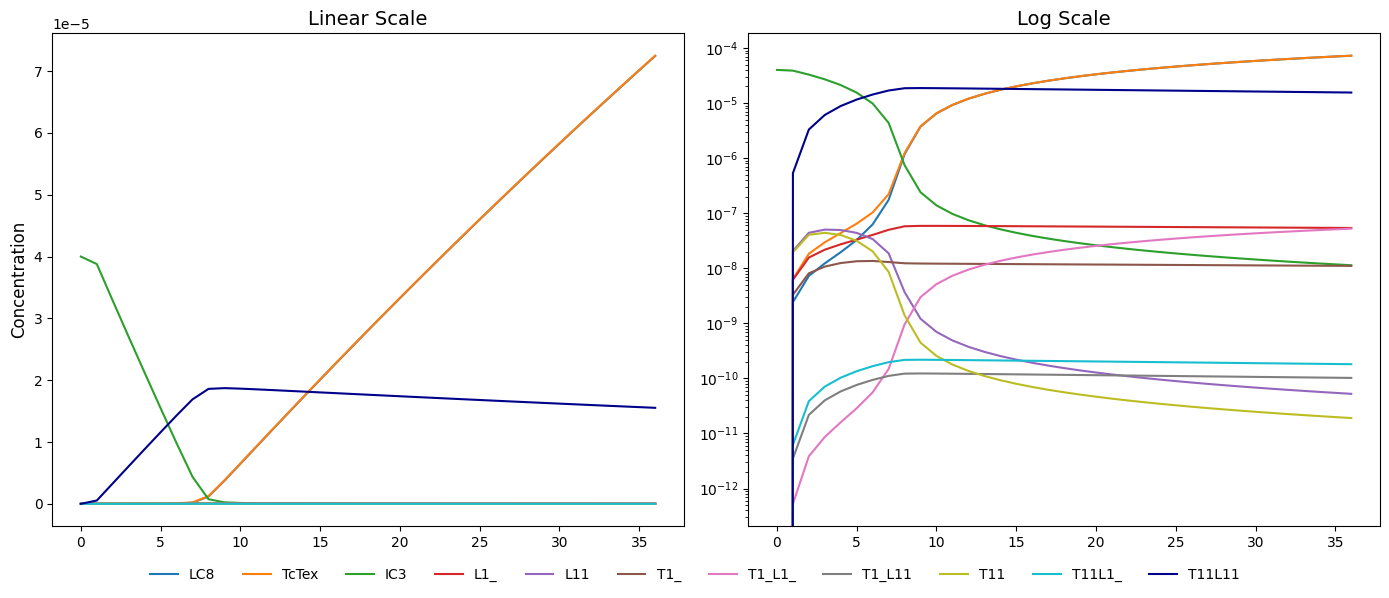

In [4]:
dg=np.array([-6.16,-13.3,-5.22,-5.22-6.16,-5.22-13.3,-12.7,-12.7-6.16,-13.3-12.7]) # dg for each binding state in the order of binding_states 
dh=np.array([-9.34,-25.2,-2.20,-9.34-2.20,-2.20-25.2,-13.8,-13.8-9.34,-13.8-25.2]) # dh for each binding state in the order of binding_states 
in_syringe=np.array([True,True,False]) # indicate what is in the syringe in the order of names_components
concentrations=np.array([0.0004,0.0004,0.00004])
filter_prior=None #for filtering use np.array([2,2,1]) (not recommended for three components)
measurement_errors=[0.1,0.2,0.1] # relative measurement errors

names_components_syn=['LC8','TcTex', 'IC3'] # for simple legs only keep the analytes that are really present (no need to adjust anything above), ordering does not matter

iso=binding.synthetic_isotherm(dg=dg, dh=dh, total_concentrations=concentrations,
                           dh_0=0, sigma=1, names_components_syn=names_components_syn, 
                           concentration_estimate_syn=concentrations*np.random.normal(1,measurement_errors),
                           in_syringe_syn=in_syringe, filter_prior_syn=filter_prior,
                           first_inj_vol= 2, inj_vol = 10, inj_count = 35, Temp=273.15+25 , V0 = 1.42e-3, show_concs=True)


In [5]:
#save isotherm for future use
iso.save('test/', 'syn_1.csv')